In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np


%matplotlib inline

In [16]:
df = pd.read_csv("total.csv", sep="∞", quoting=3, encoding='UTF-8', engine='python')
# Удаляем поле Unnamed
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,date,hour,slogan sith,slogan jedi,call jedi,call sith,show first treat,start attack,call the death star,comming the death star
0,2021-05-30,20.0,22,NaN,40,542,564,160,182,191
1,2021-05-30,21.0,24,NaN,24,446,478,160,141,153
2,2021-05-30,22.0,20,1.0,28,402,386,126,128,122
3,2021-05-30,23.0,4,NaN,27,258,254,81,100,92
4,2021-05-31,0.0,4,NaN,11,115,132,29,41,49
...,...,...,...,...,...,...,...,...,...,...
156,2021-06-06,15.0,57,6.0,48,631,1091,432,373,450
157,2021-06-06,16.0,42,2.0,42,609,1167,485,405,483
158,2021-06-06,17.0,32,8.0,52,512,974,412,395,456
159,2021-06-06,18.0,47,3.0,57,591,1079,450,440,514


In [5]:
# Получаем дни со второго до последнего
# type(df['date'].drop_duplicates())
days = df['date'].unique()[1:]
days

array(['2021-05-31', '2021-06-01', '2021-06-02', '2021-06-03',
       '2021-06-04', '2021-06-05', '2021-06-06'], dtype=object)

In [6]:
# Получаем названия колонок
list(df)[2:]

['slogan sith',
 'slogan jedi',
 'call jedi',
 'call sith',
 'show first treat',
 'start attack',
 'call the death star',
 'comming the death star']

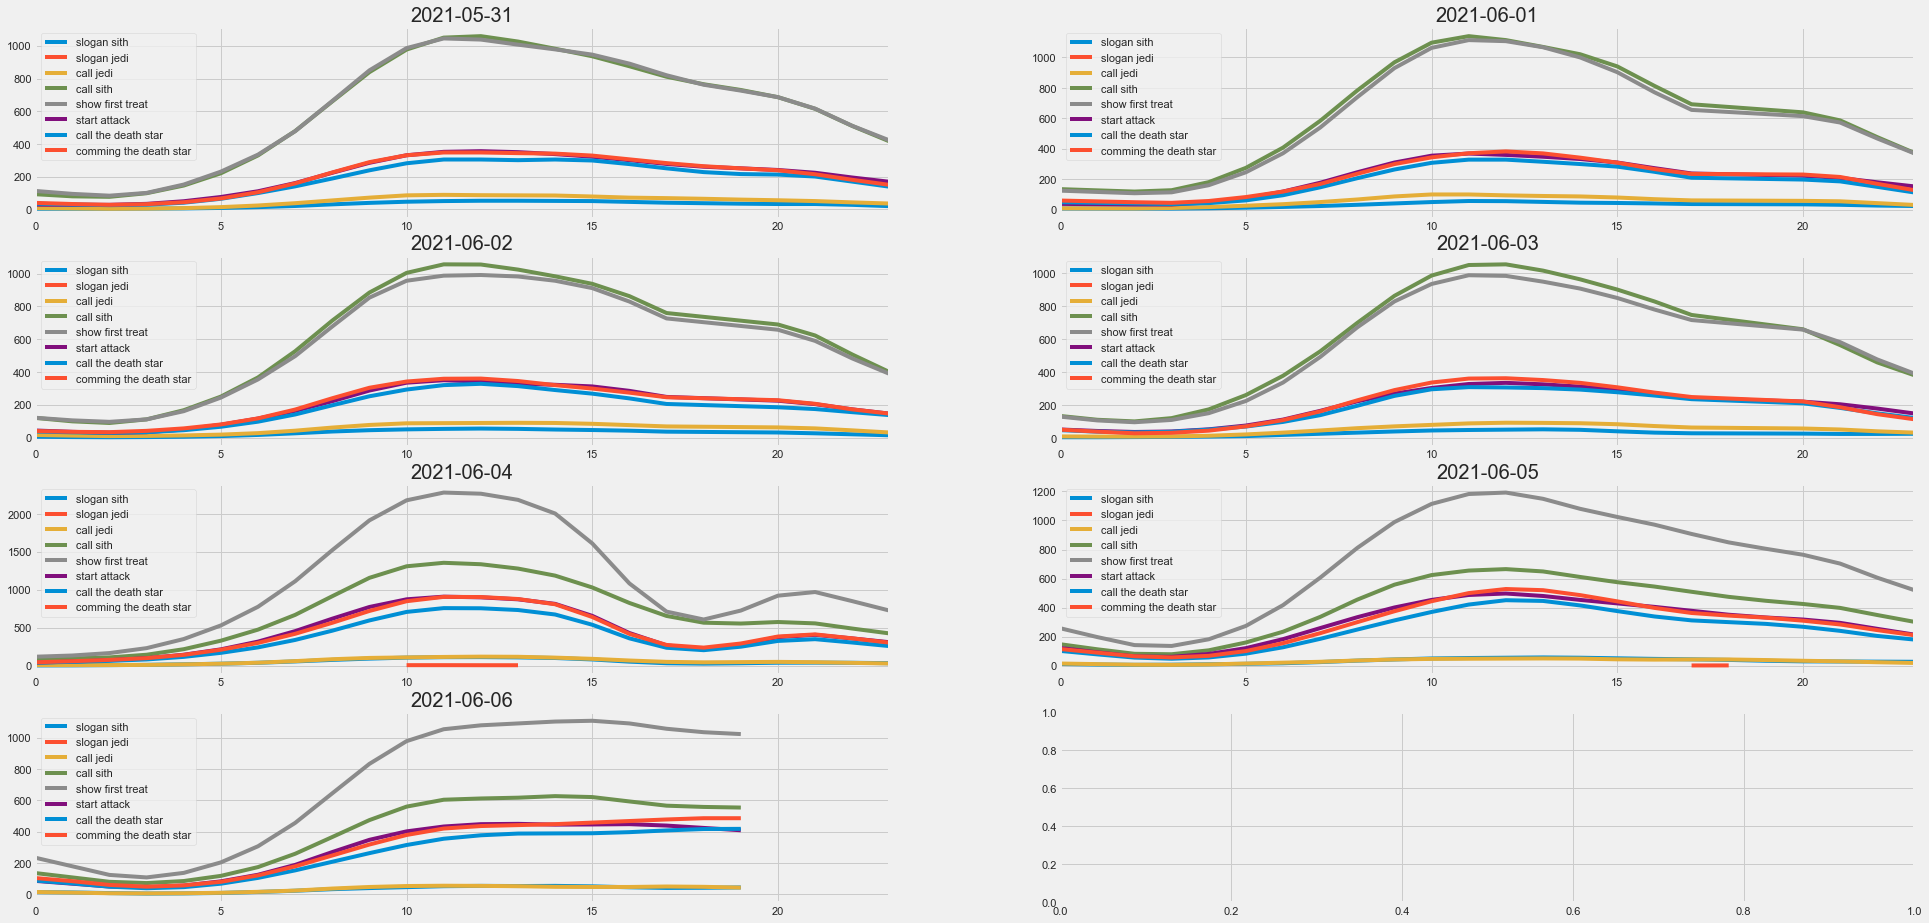

In [7]:
plt.style.use('fivethirtyeight')
from scipy.ndimage.filters import gaussian_filter1d
fig, axs = plt.subplots(4, 2, figsize=(30, 15))


for day in days:
    day_df = df[df["date"] == day]

# Определяем индексы сабплота вручную
ax_indexes = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1), (3,0)]


for x, y, day in [(0,0, "2021-05-31"), (0,1, "2021-06-01"), 
                  (1,0, "2021-06-02"), (1,1, "2021-06-03"), (2,0, "2021-06-04"), 
                  (2,1, "2021-06-05"), (3,0, "2021-06-06")]:
# for x, y, day in zip(ax_indexes, days):
    day_df = df[df["date"] == day]


    for arg in list(df)[2:]:
        # Используем Гауссову фильтрацию
        ysmoothed = gaussian_filter1d(day_df[arg], sigma=1.1)
        axs[x, y].plot(day_df.hour, ysmoothed, label=arg)
        axs[x, y].set_xlim(0, 23)
        axs[x, y].set_title(day)
        axs[x, y].legend(loc='upper left')

In [8]:
import itertools
for i in itertools.product(range(2), repeat=2):
    print(i)

(0, 0)
(0, 1)
(1, 0)
(1, 1)


In [9]:
ax_indexes = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1), (3,0)]

print(zip(ax_indexes, days))


# for q,v in itertools.product( ax_indexes, days,):
#     print(q, v)

for i, j in zip(ax_indexes, days):
    print(i, j)

(0, 0) 2021-05-31
(0, 1) 2021-06-01
(1, 0) 2021-06-02
(1, 1) 2021-06-03
(2, 0) 2021-06-04
(2, 1) 2021-06-05
(3, 0) 2021-06-06


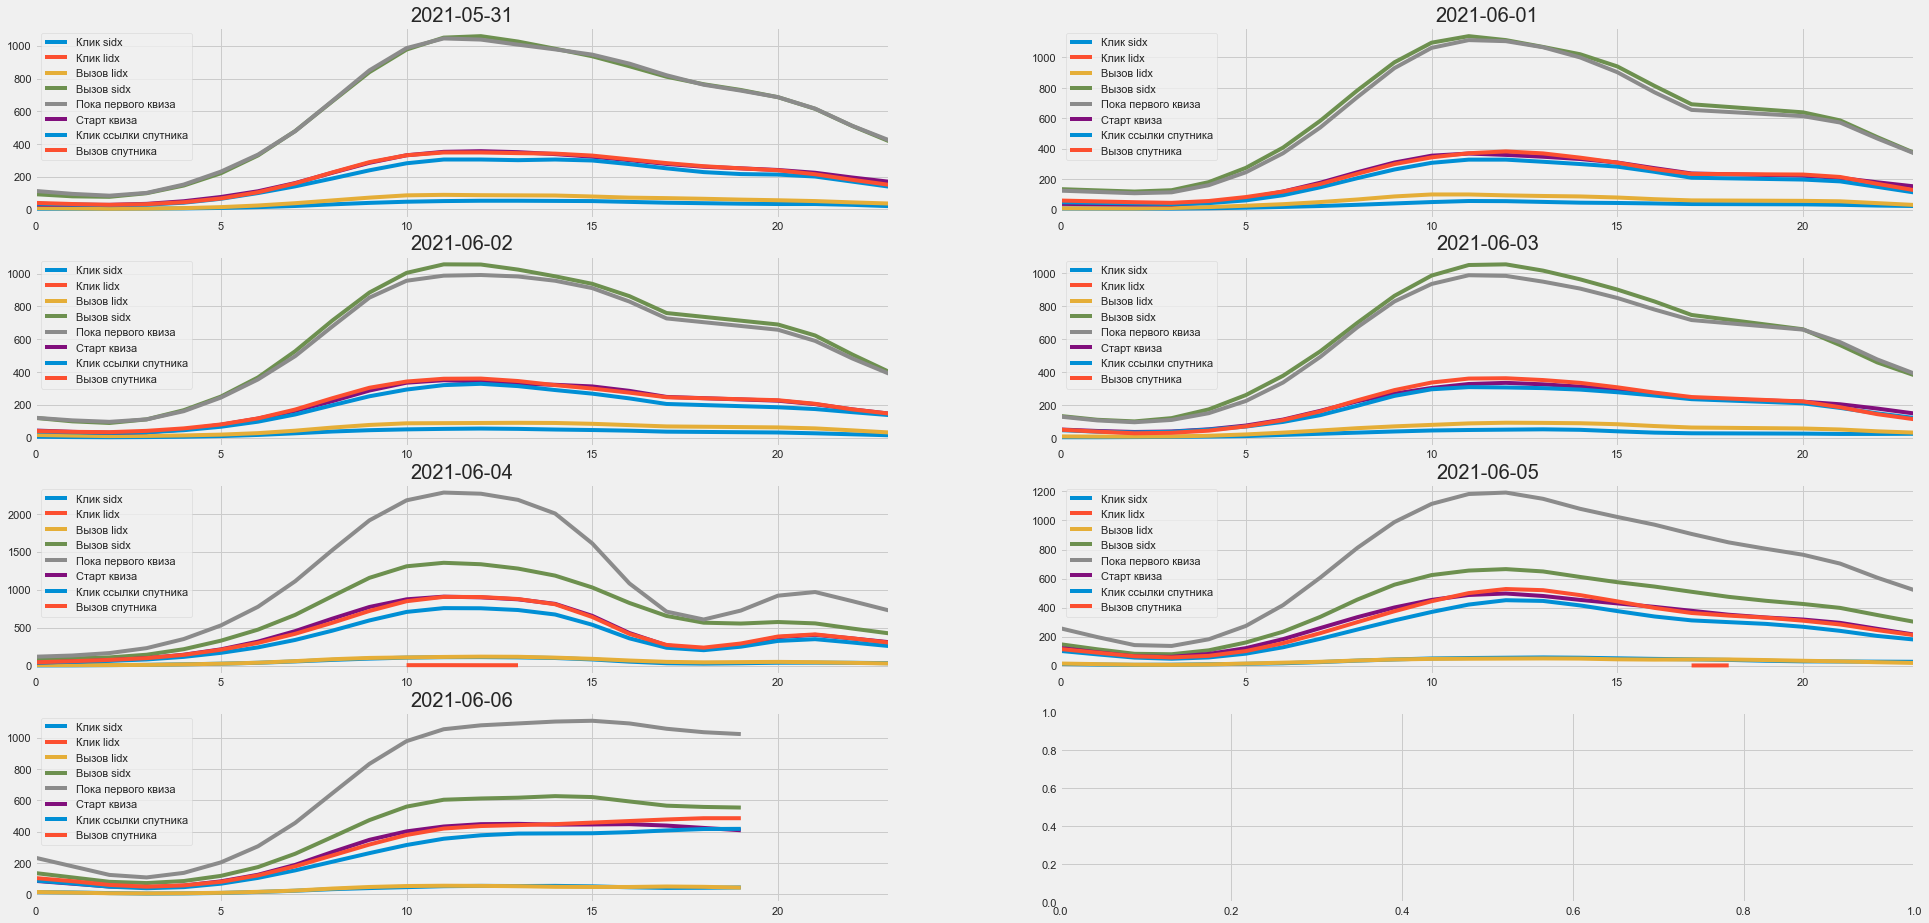

In [10]:
# более красивая итерация
plt.style.use('fivethirtyeight')
from scipy.ndimage.filters import gaussian_filter1d
fig, axs = plt.subplots(4, 2, figsize=(30, 15))


for day in days:
    day_df = df[df["date"] == day]

# Определяем индексы сабплота
ax_indexes = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1), (3,0)]

for coord, day in zip(ax_indexes, days):
    day_df = df[df["date"] == day]


    for arg in list(df)[2:]:
        
        ysmoothed = gaussian_filter1d(day_df[arg], sigma=1.1)
        axs[coord[0], coord[1]].plot(day_df.hour, ysmoothed, label=arg)
        axs[coord[0], coord[1]].set_xlim(0, 23)
        axs[coord[0], coord[1]].set_title(day)
        axs[coord[0], coord[1]].legend(loc='upper left')

In [10]:
# Определяем индексы сабплота
ax_indexes = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1), (3,0)]

# def matrix_iterator(rows, columns):
#     x = 0
#     y = 0
#     while x < rows and y < columns
#         yield x, y
#         x += 1
#         yield x, y
        
for i in range(4):
    for j in range(2):
        print(i, j)

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1


In [11]:
# l1 = [a for a in range(4)]
# l2 = [b for b in range(2)]
# for c, d in itertools.product(l1, l2):
#     print(c, d)
    

for c, d in itertools.product([a for a in range(4)] , [b for b in range(2)]):
    print(c, d)

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1


In [12]:
# Делаем функцию итератор по матричным координатам
def matrix_iterator(rows, columns):
    for row, column in itertools.product([a for a in range(rows)] , [b for b in range(columns)]):
        yield(row, column)
    


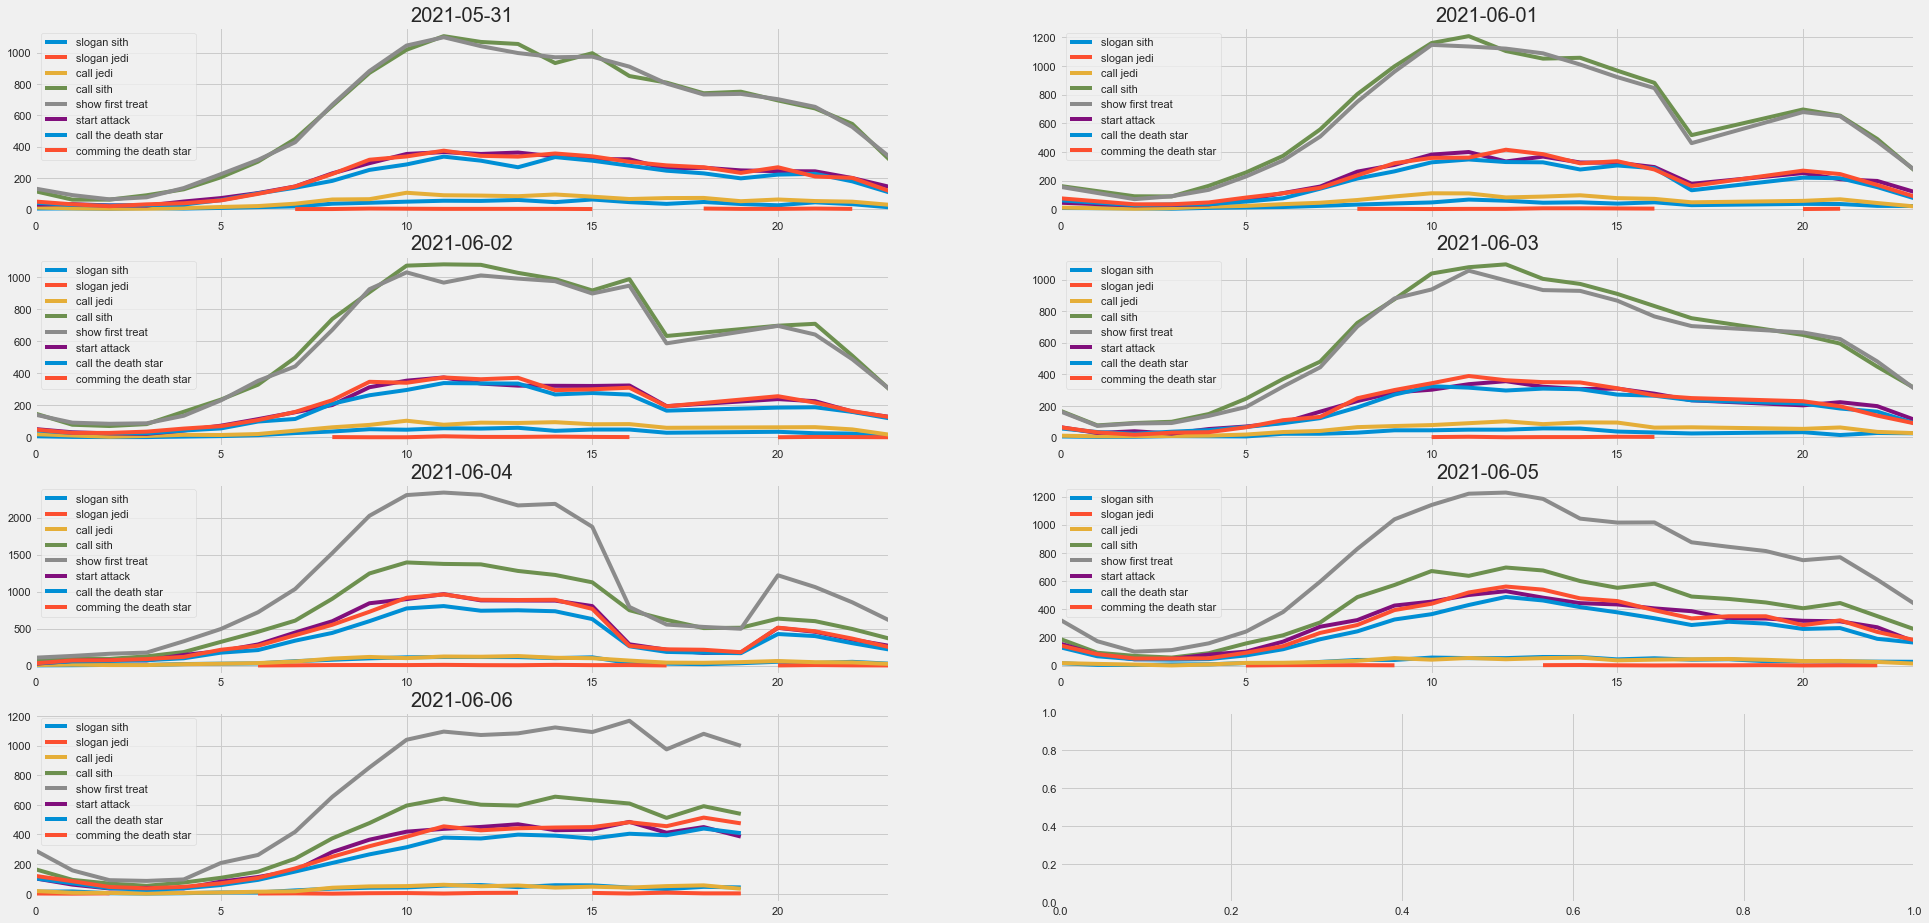

In [13]:
plt.style.use('fivethirtyeight')
from scipy.ndimage.filters import gaussian_filter1d
fig, axs = plt.subplots(4, 2, figsize=(30, 15))


for day in days:
    day_df = df[df["date"] == day]


for coord, day in zip(matrix_iterator(4, 2), days):
    day_df = df[df["date"] == day]

    for arg in list(df)[2:]:

# Пока убираем Гауссово сглаживание, возвращаем оригинальные рубленные графики        
#         ysmoothed = gaussian_filter1d(day_df[arg], sigma=1.1)
#         axs[coord[0], coord[1]].plot(day_df.hour, ysmoothed, label=arg)
        axs[coord[0], coord[1]].plot(day_df.hour, day_df[arg], label=arg)
        axs[coord[0], coord[1]].set_xlim(0, 23)
        axs[coord[0], coord[1]].set_title(day)
        axs[coord[0], coord[1]].legend(loc='upper left')

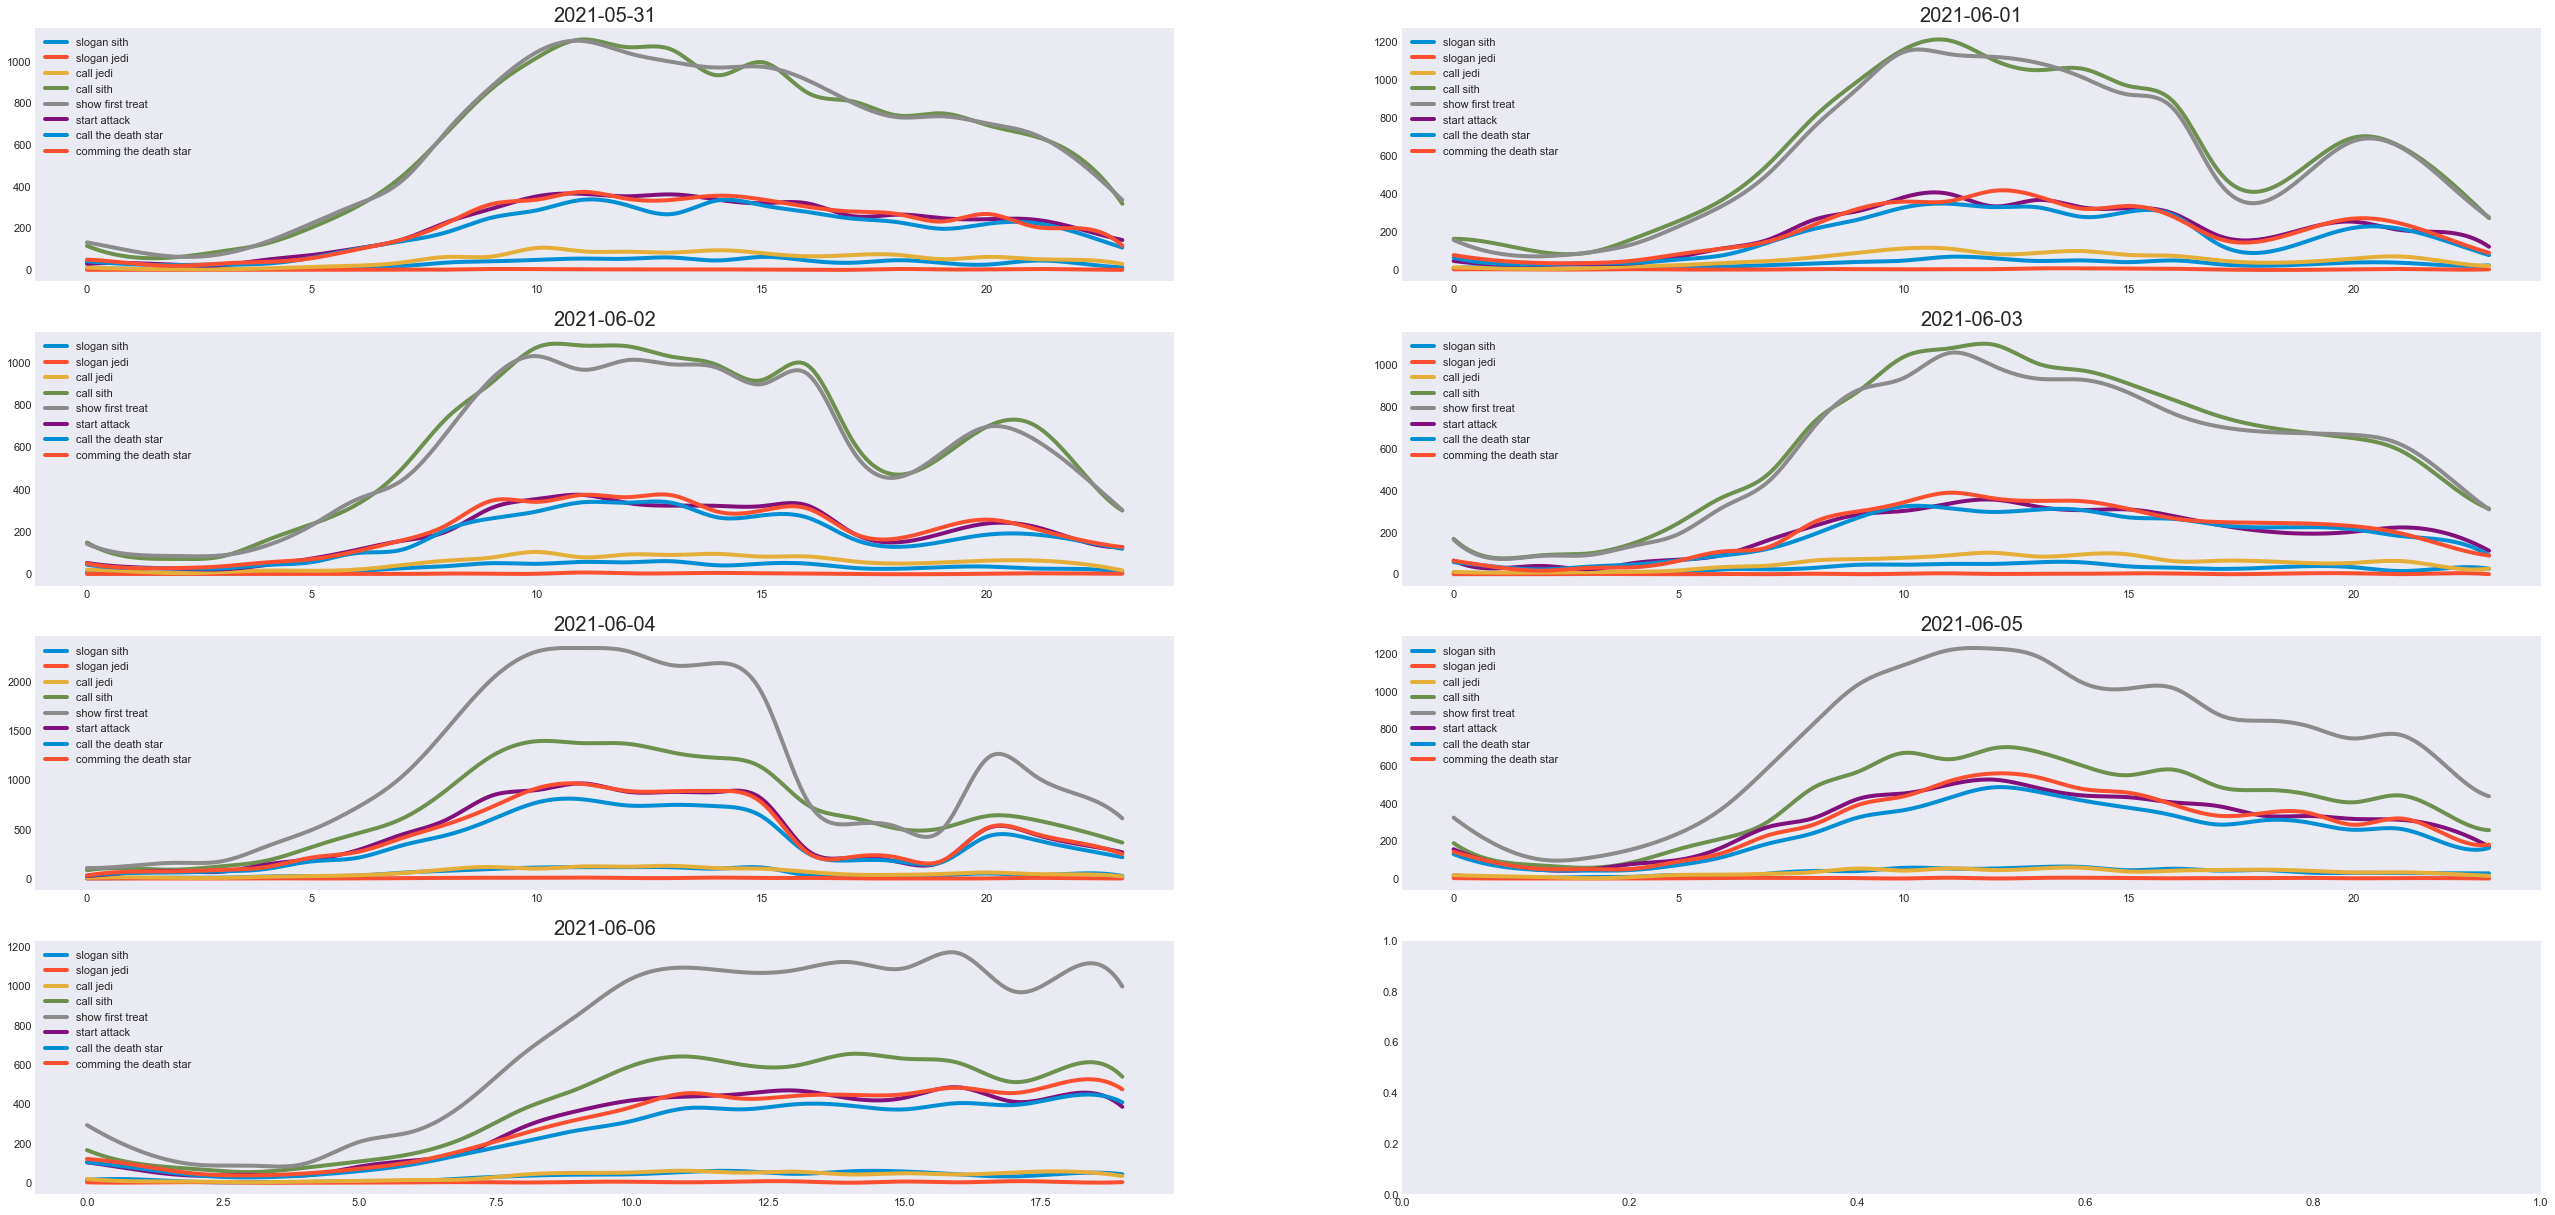

In [14]:
# Итоговый код
df = pd.read_csv("total.csv", sep="∞", quoting=3, encoding='UTF-8', engine='python')
# Удаляем поле Unnamed
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Получаем дни со второго до последнего
days = df['date'].unique()[1:]


# используем make_interp_spline, BSpline для 'округления' графиков
# https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
from scipy.interpolate import make_interp_spline, BSpline
# Используем стиль seaborn-dark 
plt.style.use('seaborn-dark')

# определяем функцию итератор по матричным координатам
def matrix_iterator(rows, columns):
    for row, column in itertools.product([a for a in range(rows)] , [b for b in range(columns)]):
        yield(row, column)

# Определяем график из 8 подграфиков в 4 строки по 2 столбца
fig, axs = plt.subplots(4, 2, figsize=(40, 20))

# Итерируемся по графикам и по дням
for coord, day in zip(matrix_iterator(4, 2), days):
    """
    Получим следующий вид перечисляемых значений:
    (0, 0) 2021-05-31
    (0, 1) 2021-06-01
    Первый кортеж это координаты подграфика в общем графике, второе значение - дата
    """
    day_df = df[df["date"] == day]

    # Итерируемся по названию колонок, начиная с 3 т.к day и hour нам не нужны.
    for arg in list(df)[2:]:

        # вместо текущей оси x в часах от 0 до 23 определяем новую ось x плотностью в 300 значений
        xnew = np.linspace(day_df.hour.min(), day_df.hour.max(), 300)

        # Нужно привести x и y к типу np.ndarray и вызвать метод make_interp_spline для плавной интерполяции
        try:
            spl = make_interp_spline(np.array(day_df.hour.values.tolist()), 
                                 np.array(day_df[arg].values.tolist()), k=3)  # type: BSpline
        except ValueError: 
            # при возникновении этой ошибки заменить nan на нули
            spl = make_interp_spline(np.array(day_df.hour.values.tolist()), 
                                 np.array(day_df[arg].fillna(0).values.tolist()), k=3)  # type: BSpline

        # получаем 'сглаженные' значения по оси y. class 'numpy.ndarray'
        power_smooth = spl(xnew) 
        # строим графики, делаем разный стиль линий для похожих цветов
        axs[coord[0], coord[1]].plot(xnew, power_smooth, label=arg, linestyle='--') if arg in ('Клик ссылки спутника', 'Вызов спутника') else axs[coord[0], coord[1]].plot(xnew, power_smooth, label=arg)
        # добавляем подпись
        axs[coord[0], coord[1]].set_title(day)
        # добавляем легенду и ее местоположение
        axs[coord[0], coord[1]].legend(loc='upper left')

In [15]:
# Варианты доступных стилей
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']